# Train pre-trained ADAGE models on Staph epi data

### Georgia Doing 2022

This notebook walks through traineding pre-trained models on S. epi data
The main objectives are to validate the training workflow using
1. Loss and validation loss curves
2. Node weight distributions
3. Node KEGG and GO enrichments

In [2]:
import run_model_preT
import run_model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imp import reload
import Adage
from scipy.stats import hypergeom
import csv

In [3]:
# for dev purposes, while updating run_model.py need to reload
# for dev purposes, while updating run_model.py need to reload
reload(run_model_preT)
reload(run_model)
reload(Adage)

<module 'Adage' from '/Users/doingg/Dropbox (JAX)/Github/seqADAGE/Py/Adage.py'>

## Base features (from ADAGE)

For the sake of this efficiency, starting with the following parameters:

* hidden features: 300
* epochs: 500
* curruption: 0.01
* batchs zie: 10
* validatoin split: 0.1
* activation: sigmoid
* objective: binary cross-entropy



2266 239


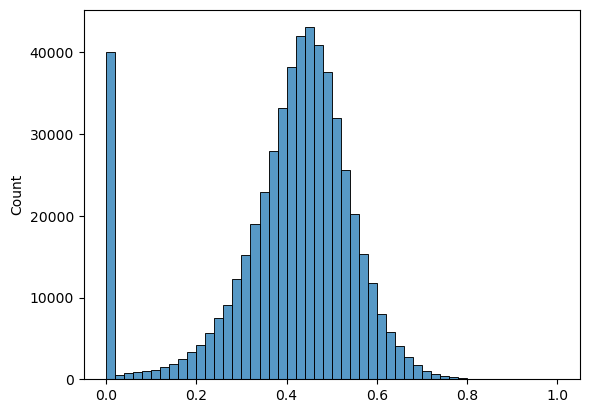

In [4]:
#adage_comp = pandas.read_csv('data_files/ADAGE_compendium.csv')
all_comp = np.loadtxt(open('../data_files/se16_log_counts_norm_01_nonames.csv', "rb"),delimiter=',',skiprows = 1)
gene_num = np.size(all_comp, 0)
samp_num = np.size(all_comp, 1)
print(gene_num, samp_num)
fig = sns.histplot(all_comp.flatten(), bins = 50)

In [5]:
inits = ['glorot_uniform', 'glorot_normal']
L1_norm = [0, 1e-5]
L2_norm = [0, 1e-5]
act_fun = ['sigmoid', 'tanh','relu']
tied = [True, False]
seq_temp, seq_temp2 = run_model_preT.run_model('../data_files/se_se16_epi_comp_log_counts_norm_01.csv',
                                               '../data_files/se_se16_epi_comp_log_counts_norm_01.csv',
                                               960, enc_dim = 300, kl1=0, act = 'tanh', tied = True, epochs=10, init='glorot_normal')
arr_temp, arr_temp2 = run_model_preT.run_model('../data_files/train_set_normalized.csv',
                                               '../data_files/train_set_normalized.csv',
                                               960,enc_dim = 300, kl1=0, act = 'tanh', tied = True, epochs=10, init='glorot_normal')
tf_adage = Adage.Adage(arr_temp.autoencoder, arr_temp.history, arr_temp.compendium)
tf_weights = np.array(pd.read_csv('../outputs/ADAGE_OG_weights.csv', header = None))
tf_cost = pd.read_csv('../outputs/ADAGE_OG_cost_log.csv')
tf_adage.weights = tf_weights
tf_adage.loss = tf_cost['cost']
tf_adage.set_hwg_cutoff(2.5).shape

updated22
Epoch 1/10


2023-06-21 14:15:43.125609: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


22/22 [==============================] - 0s 7ms/step - loss: 0.7018 - val_loss: 0.6994
Epoch 2/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6972 - val_loss: 0.6949
Epoch 3/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6934 - val_loss: 0.6918
Epoch 4/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6907 - val_loss: 0.6896
Epoch 5/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6888 - val_loss: 0.6881
Epoch 6/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6874 - val_loss: 0.6869
Epoch 7/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6863 - val_loss: 0.6860
Epoch 8/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6854 - val_loss: 0.6851
Epoch 9/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6845 - val_loss: 0.6843
Epoch 10/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6837 - val_loss: 0.6836
(2,)
(2,)
(2,)
Epoch 1/10


/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


22/22 [==============================] - 0s 5ms/step - loss: 0.6831 - val_loss: 0.6830
Epoch 2/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6824 - val_loss: 0.6823
Epoch 3/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6815 - val_loss: 0.6815
Epoch 4/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6806 - val_loss: 0.6806
Epoch 5/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6797 - val_loss: 0.6798
Epoch 6/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6788 - val_loss: 0.6789
Epoch 7/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6779 - val_loss: 0.6781
Epoch 8/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6770 - val_loss: 0.6772
Epoch 9/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6760 - val_loss: 0.6763
Epoch 10/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6751 - val_loss: 0.6754
Epoch 1/50
22/22 [============

/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(2,)
(2,)
(2,)
Epoch 1/10
 1/86 [..............................] - ETA: 11s - loss: 0.6700

/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


86/86 [==============================] - 1s 5ms/step - loss: 0.6698 - val_loss: 0.6721
Epoch 2/10
86/86 [==============================] - 0s 5ms/step - loss: 0.6675 - val_loss: 0.6702
Epoch 3/10
86/86 [==============================] - 0s 5ms/step - loss: 0.6652 - val_loss: 0.6685
Epoch 4/10
86/86 [==============================] - 0s 6ms/step - loss: 0.6632 - val_loss: 0.6669
Epoch 5/10
86/86 [==============================] - 0s 5ms/step - loss: 0.6613 - val_loss: 0.6655
Epoch 6/10
86/86 [==============================] - 0s 5ms/step - loss: 0.6596 - val_loss: 0.6643
Epoch 7/10
86/86 [==============================] - 0s 5ms/step - loss: 0.6581 - val_loss: 0.6633
Epoch 8/10
86/86 [==============================] - 0s 5ms/step - loss: 0.6567 - val_loss: 0.6623
Epoch 9/10
86/86 [==============================] - 0s 5ms/step - loss: 0.6555 - val_loss: 0.6616
Epoch 10/10
86/86 [==============================] - 0s 5ms/step - loss: 0.6544 - val_loss: 0.6609
Epoch 1/50
86/86 [============

(5549, 600)

In [ ]:
inits = ['glorot_uniform', 'glorot_normal']
L1_norm = [0, 1e-5]
L2_norm = [0, 1e-5]
act_fun = ['sigmoid', 'tanh','relu']
tied = [True]

model_dict2 = {
    "tf_adage": tf_adage
}

model_dict_pre = {
    "tf_adage": tf_adage
}

model_dict_seq2 = {
    "tf_adage": tf_adage
}

for seed in range(1):
    for i in inits:
    #print(i)
        for l in L1_norm:
        #print(l)
            for a in act_fun:
            #print(a)
                for t in tied:
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t)+ str(seed+571)
                    print(name)
                    mseqpre , mseq = run_model_preT.run_model('../data_files/se_MAPPED_sa_NCTC3825_filt_norm_log_01.csv',
                                                              '../data_files/se_se16_epi_comp_log_counts_norm_01.csv',
                                                              seed=seed+571,
                                                              enc_dim = 50,
                                                              kl1=l, 
                                                              act = a, 
                                                              tied = t, 
                                                              epochs=10, 
                                                              init=i, 
                                                              lr = 0.1)
                    #marr = run_model.run_model('../data_files/train_set_normalized.csv',seed=seed+560,kl1=l, act = a, tied = t, epochs=300, init=i, lr = 0.1)

                    #model_dict2[name] = marr
                    model_dict_pre[name] = mseqpre
                    model_dict_seq2[name] = mseq

In [ ]:
inits = ['glorot_uniform', 'glorot_normal']
L1_norm = [0, 1e-5]
L2_norm = [0, 1e-5]
act_fun = ['sigmoid', 'tanh','relu']
tied = [True]

model_dictSE = {
    "tf_adage": tf_adage
}

model_dictSA = {
    "tf_adage": tf_adage
}



for seed in range(1):
    for i in inits:
    #print(i)
        for l in L1_norm:
        #print(l)
            for a in act_fun:
            #print(a)
                for t in tied:
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t)+ str(seed+571)
                    print(name)
                    mseqSE = run_model.run_model('../data_files/se_se16_epi_comp_log_counts_norm_01.csv',
                                               seed=seed+571,
                                               enc_dim = 50,
                                               kl1=l, 
                                               act = a, 
                                               tied = t,
                                               epochs=10,
                                               init=i,
                                               lr = 0.1)
                    mseqSA = run_model.run_model('../data_files/sa_NCTC3825_filt_norm_log_01.csv',
                                               seed=seed+571,
                                               enc_dim = 50,
                                               kl1=l, 
                                               act = a, 
                                               tied = t,
                                               epochs=10,
                                               init=i,
                                               lr = 0.1)
                    #marr = run_model.run_model('../data_files/train_set_normalized.csv',seed=seed+560,kl1=l, act = a, tied = t, epochs=300, init=i, lr = 0.1)

                    #model_dict2[name] = marr
                    model_dictSE[name] = mseqSE
                    model_dictSA[name] = mseqSA

In [ ]:
inits = ['glorot_uniform', 'glorot_normal']
L1_norm = [0, 1e-5]
L2_norm = [0, 1e-5]
act_fun = ['sigmoid', 'tanh','relu']
tied = [True]

model_dict_preCTRL = {
    "tf_adage": tf_adage
}

model_dict_seq2CTRL = {
    "tf_adage": tf_adage
}

for seed in range(1):
    for i in inits:
    #print(i)
        for l in L1_norm:
        #print(l)
            for a in act_fun:
            #print(a)
                for t in tied:
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(seed+571)
                    print(name)
                    mseqpre , mseq = run_model_preT.run_model('../data_files/se_se16_epi_comp_log_counts_norm_01.csv',
                                                              '../data_files/se_se16_epi_comp_log_counts_norm_01.csv',
                                                              seed=seed+571,
                                                              enc_dim = 50,
                                                              kl1=l, 
                                                              act = a, 
                                                              tied = t, 
                                                              epochs=10, 
                                                              init=i, 
                                                              lr = 0.1)
                    #marr = run_model.run_model('../data_files/train_set_normalized.csv',seed=seed+560,kl1=l, act = a, tied = t, epochs=300, init=i, lr = 0.1)

                    #model_dict2[name] = marr
                    model_dict_preCTRL[name] = mseqpre
                    model_dict_seq2CTRL[name] = mseq

[Text(0.5, 1.0, 'tf_adage')]

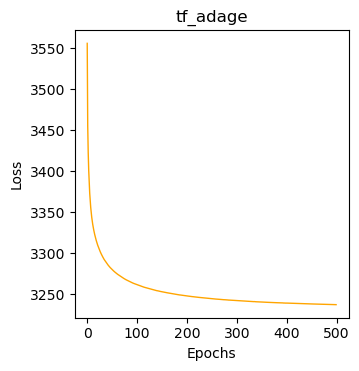

In [9]:
yd = 1 #len(inits) * len(L1_norm)
xd = 1 #len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)


#name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(460)
                #print(name)
name = 'tf_adage'
model_temp = model_dict_seq2[name]
ax.plot(list(range(0,500)), model_temp.loss, linewidth=1, markersize=2, color = 'orange')
ax.set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
#ax.axvline(x = np.std(model_temp.weights)*2.5)
#ax.axvline(x = np.std(model_temp.weights)*-2.5)
ax.set(title = name)
#ax.set_yscale('log')



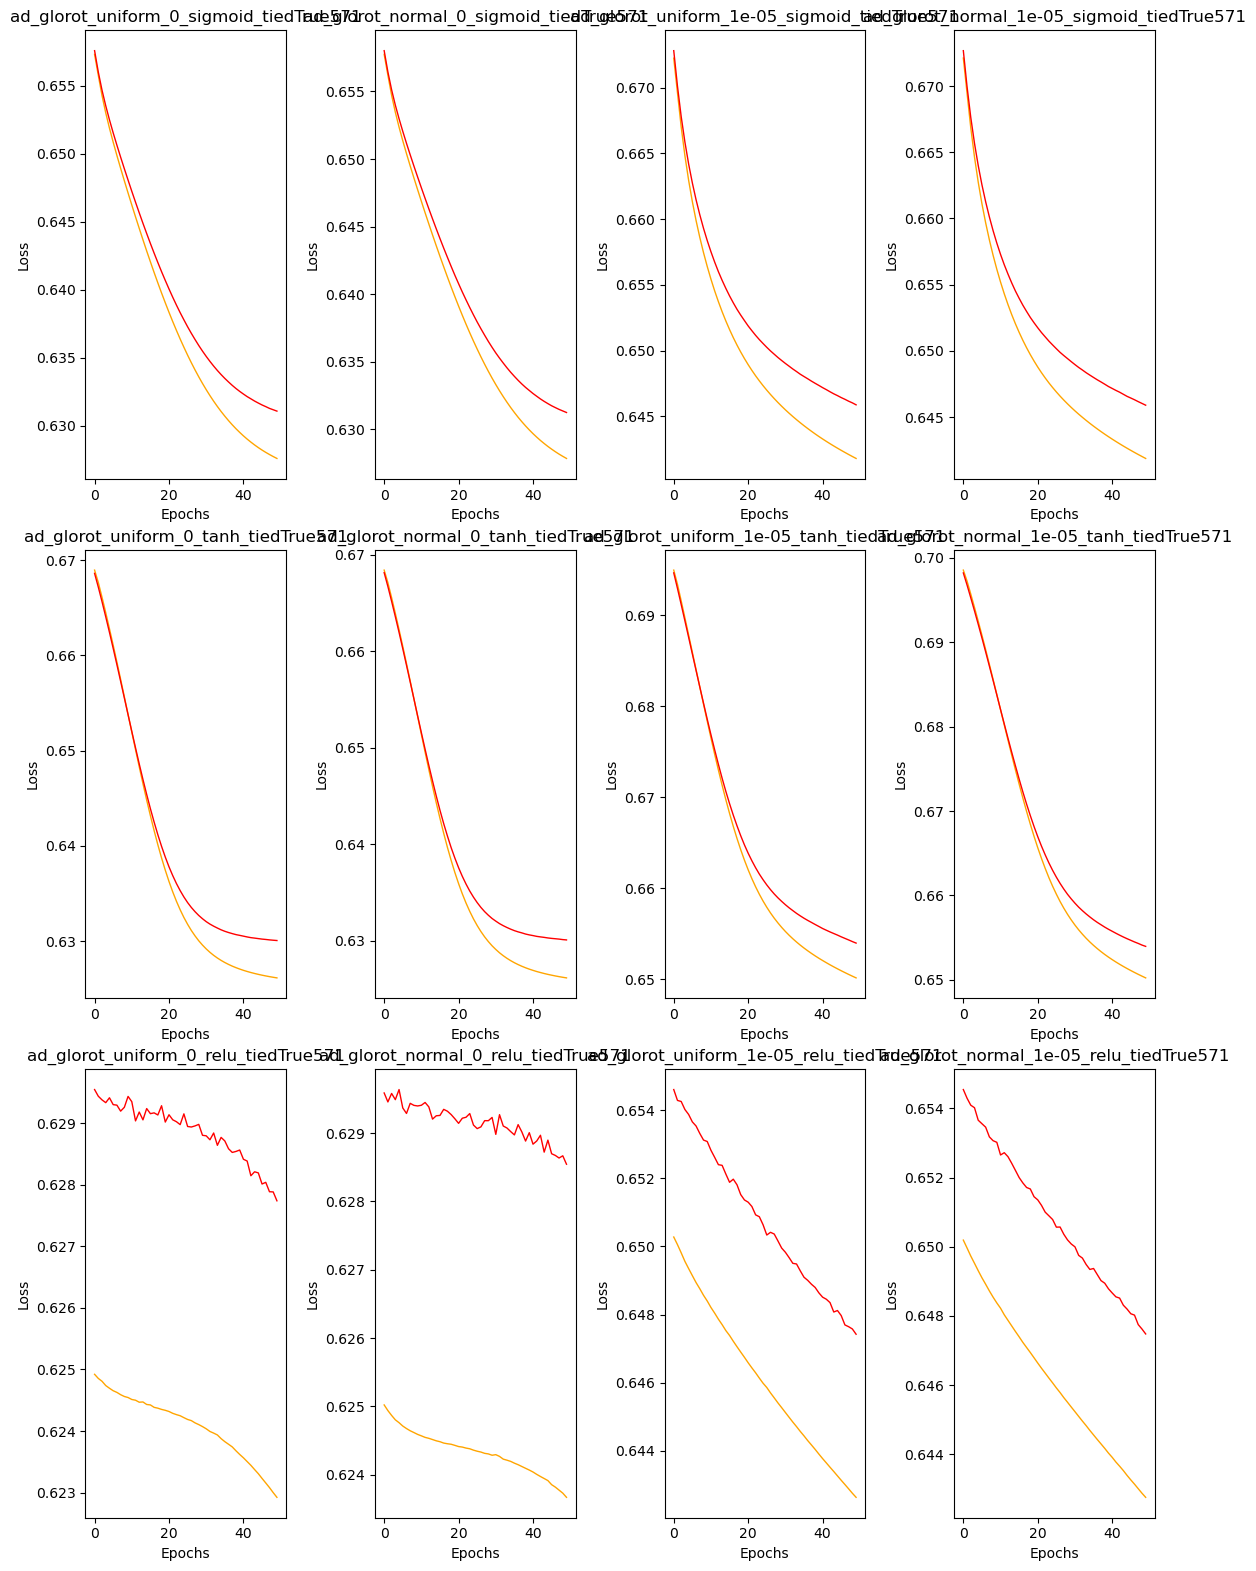

In [10]:
model_dict = model_dict_seq2

yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(571)
                #print(name)
                model_temp = model_dict[name]
                ax[xi,yi].plot(list(range(0,50)), model_temp.loss, linewidth=1, markersize=2, color = 'orange')
                ax[xi,yi].plot(list(range(0,50)), model_temp.val_loss, linewidth=1, markersize=2, color = 'red')
                ax[xi,yi].set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
                xi = xi+1
        yi=yi+1


    

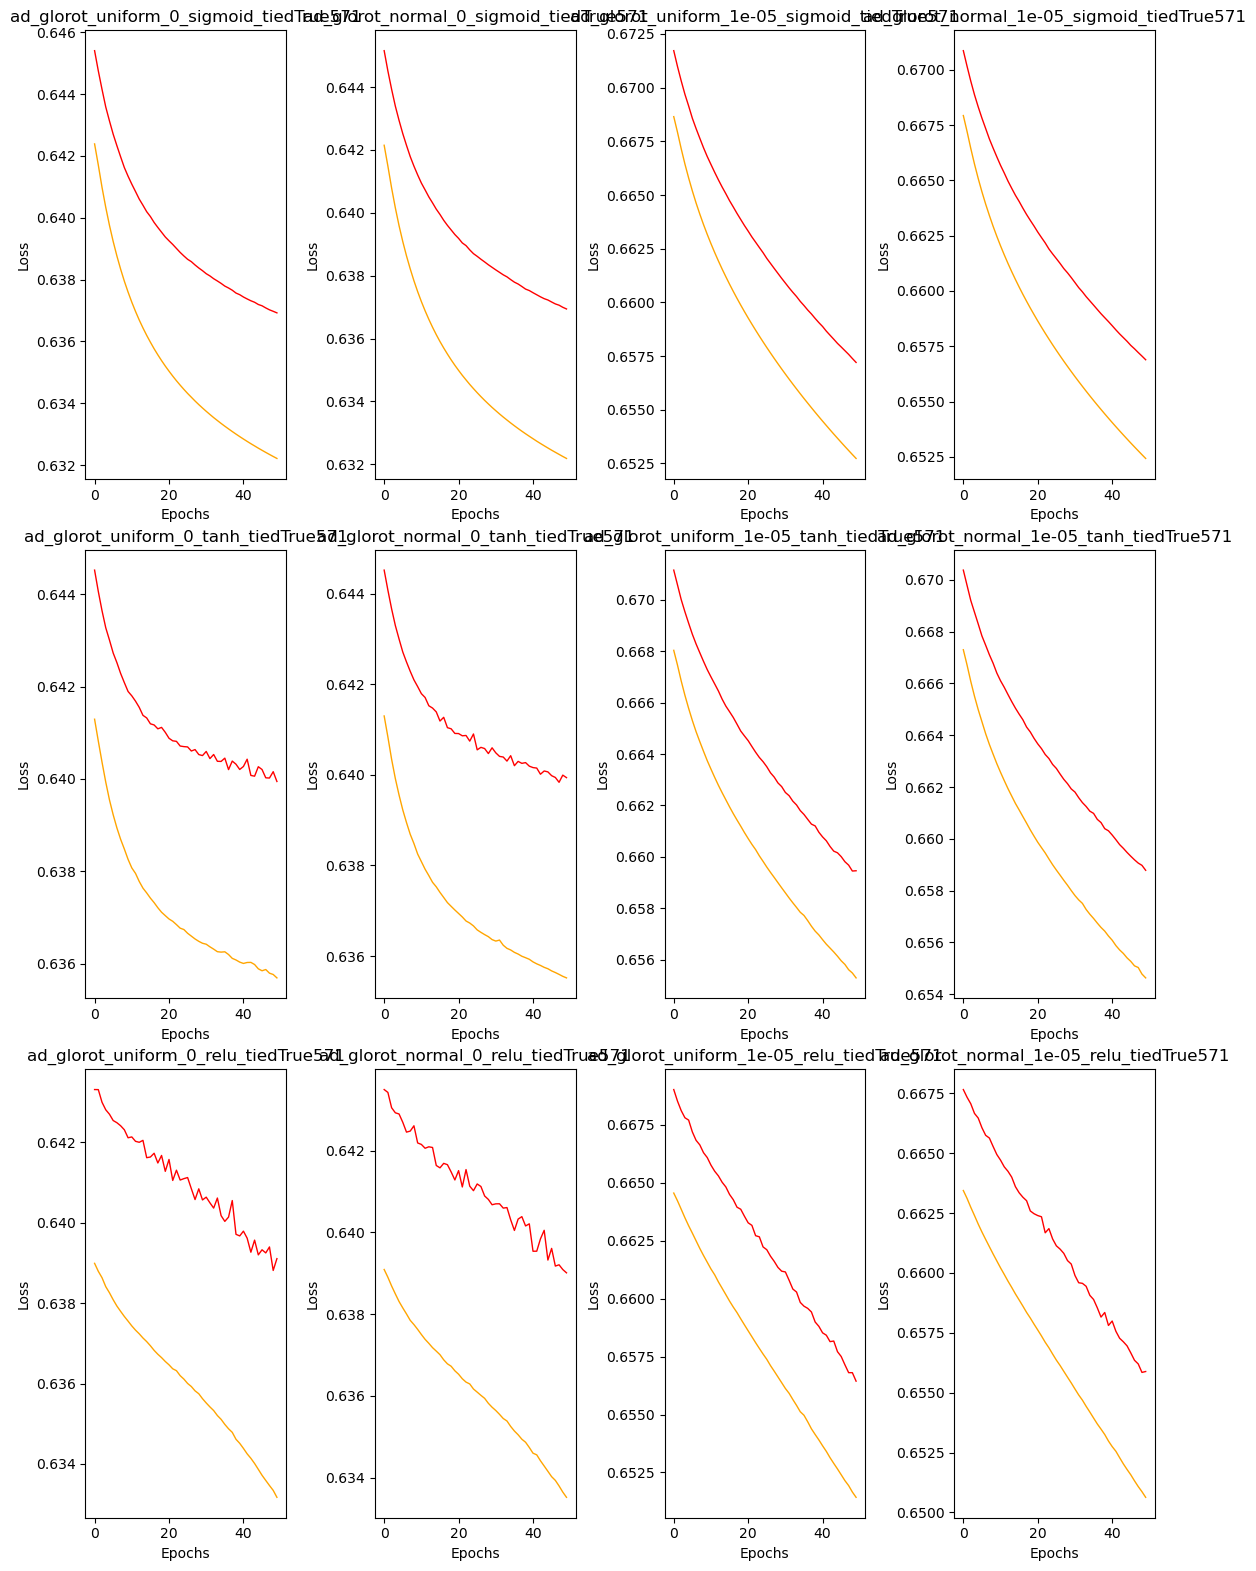

In [43]:
model_dict = model_dict_seq2CTRL

yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(571)
                #print(name)
                model_temp = model_dict[name]
                ax[xi,yi].plot(list(range(0,50)), model_temp.loss, linewidth=1, markersize=2, color = 'orange')
                ax[xi,yi].plot(list(range(0,50)), model_temp.val_loss, linewidth=1, markersize=2, color = 'red')
                ax[xi,yi].set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
                xi = xi+1
        yi=yi+1

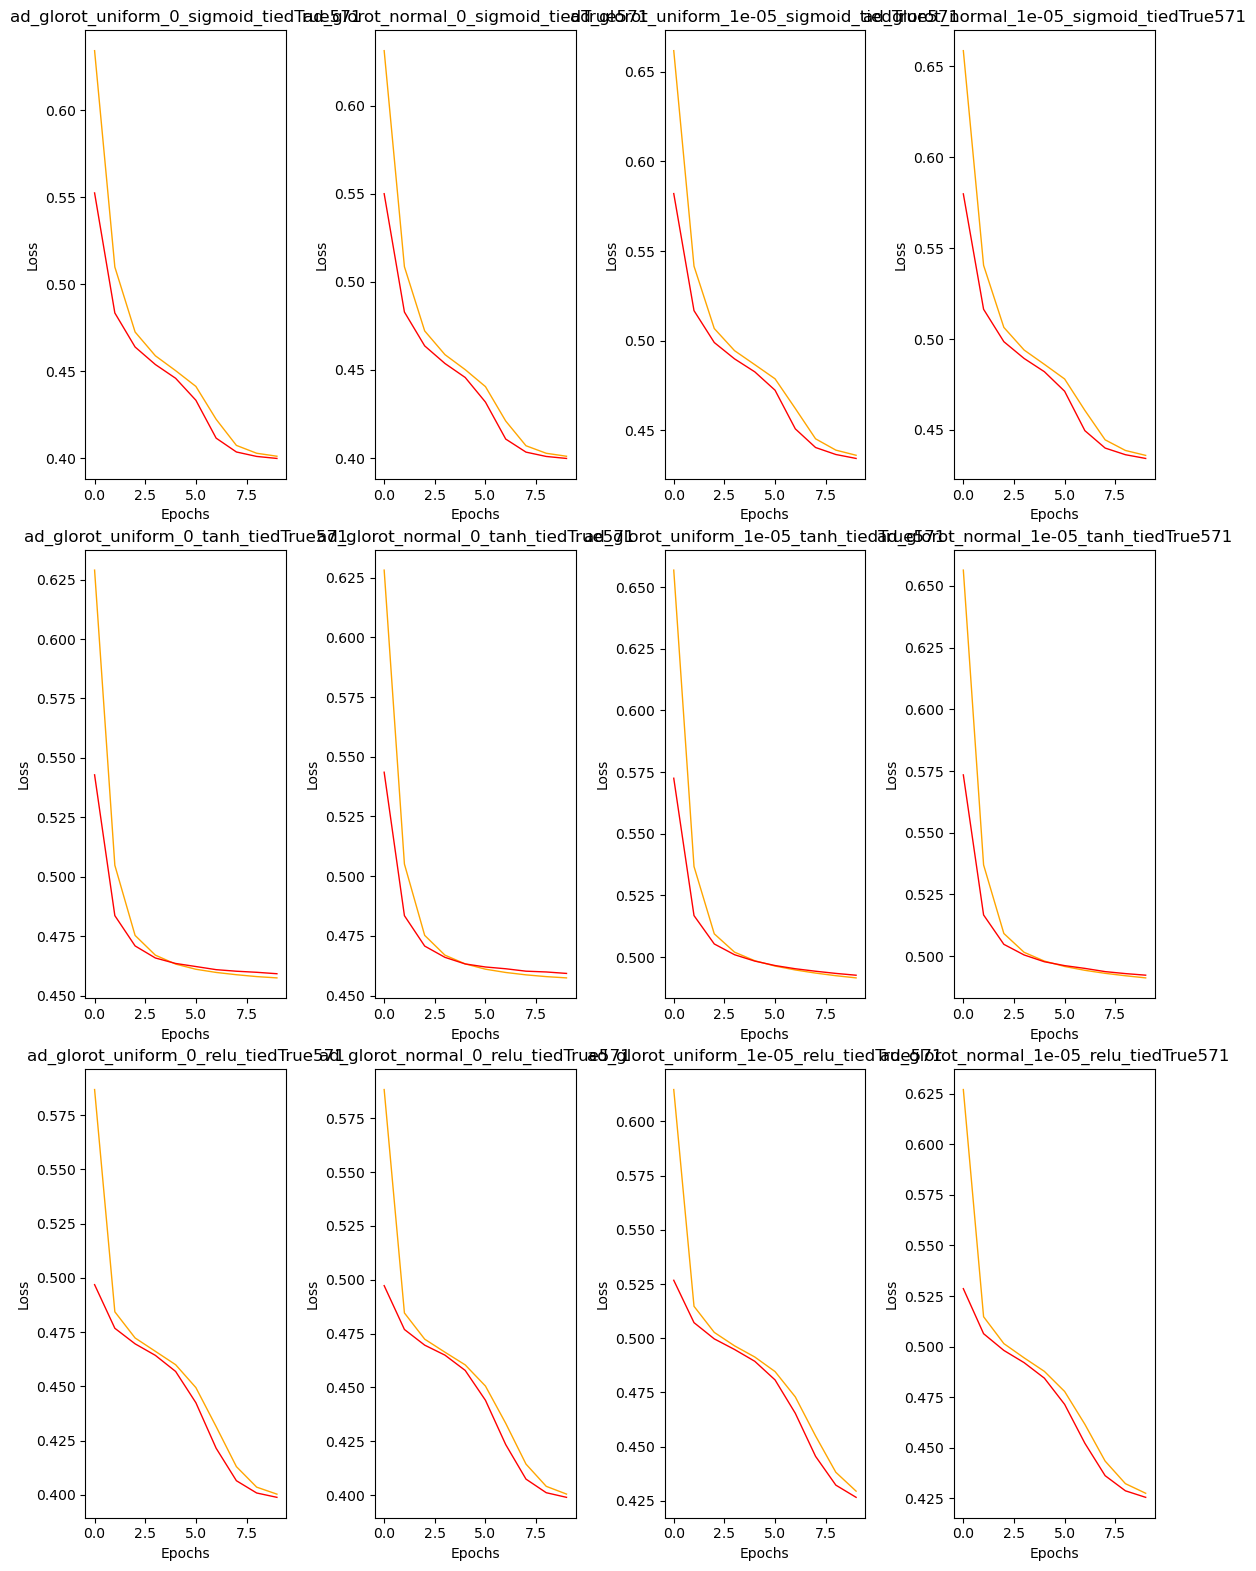

In [44]:
model_dict = model_dict_pre

yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(571)
                #print(name)
                model_temp = model_dict[name]
                ax[xi,yi].plot(list(range(0,10)), model_temp.loss, linewidth=1, markersize=2, color = 'orange')
                ax[xi,yi].plot(list(range(0,10)), model_temp.val_loss, linewidth=1, markersize=2, color = 'red')
                ax[xi,yi].set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
                xi = xi+1
        yi=yi+1


    

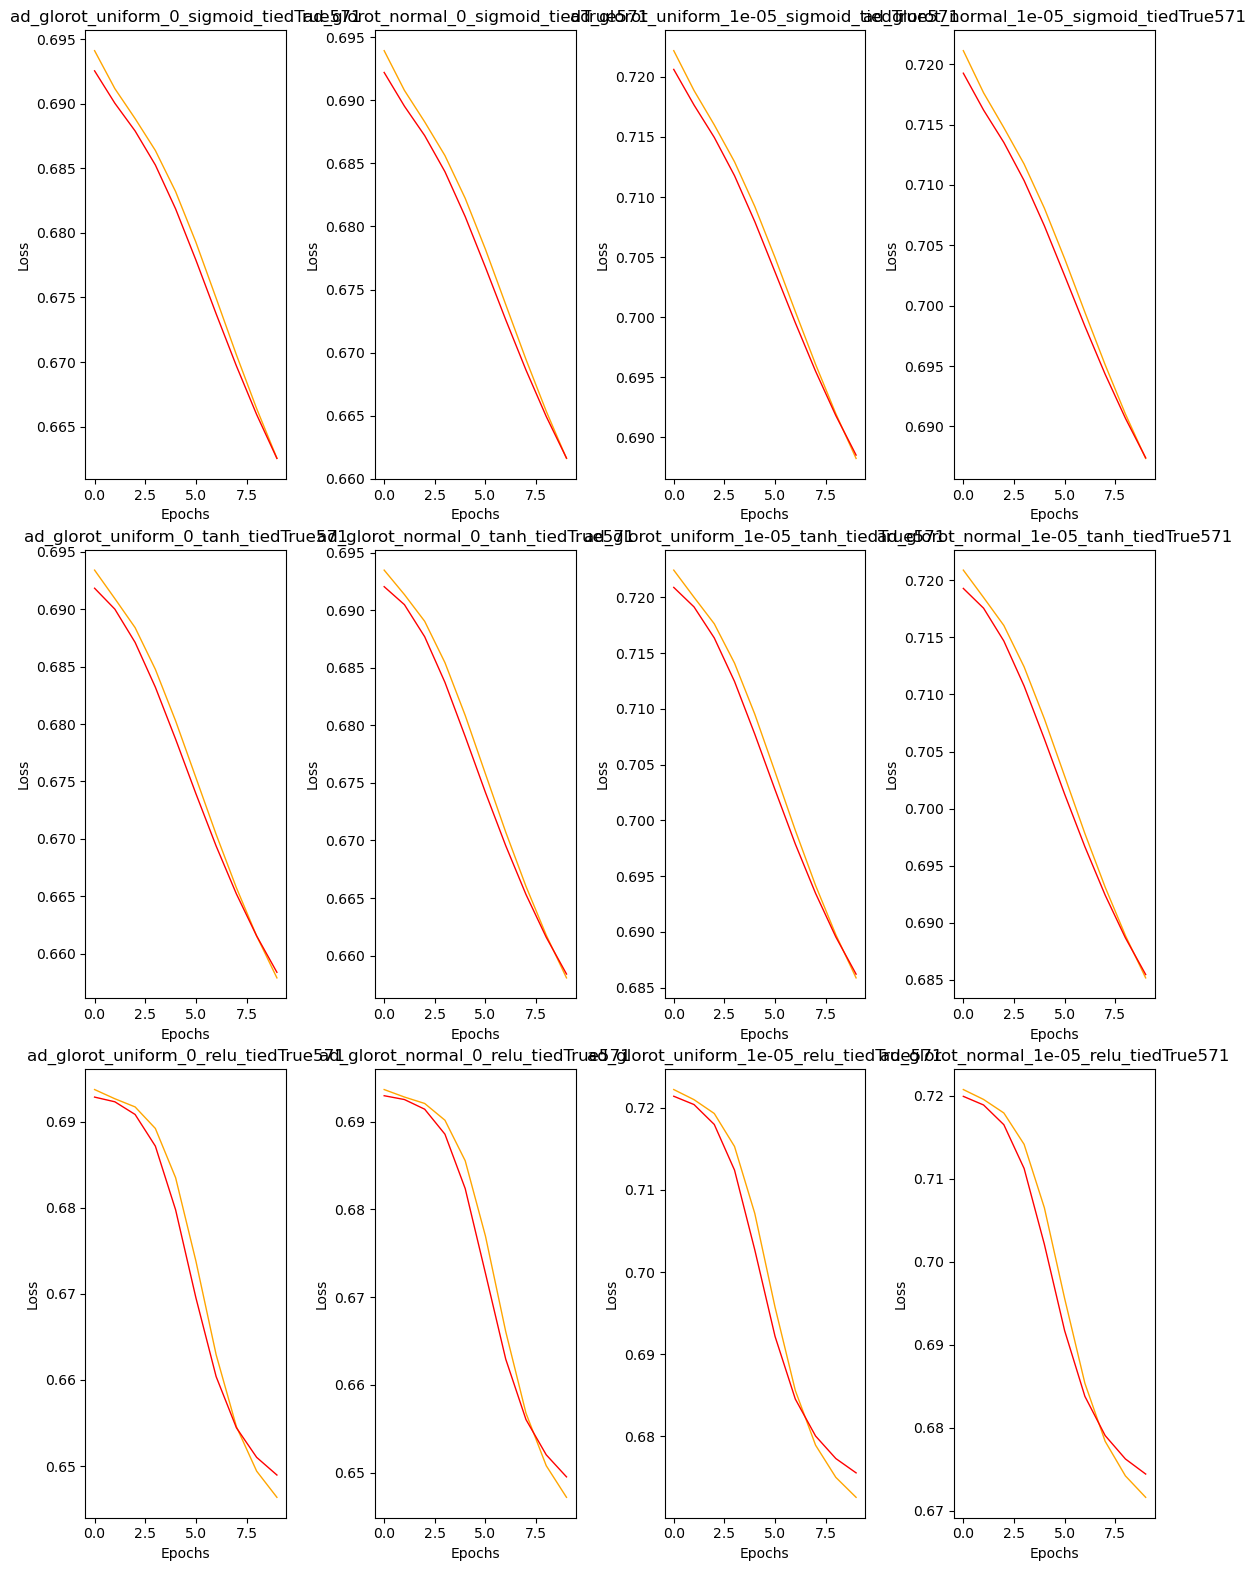

In [45]:
model_dict = model_dict_preCTRL

yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(571)
                #print(name)
                model_temp = model_dict[name]
                ax[xi,yi].plot(list(range(0,10)), model_temp.loss, linewidth=1, markersize=2, color = 'orange')
                ax[xi,yi].plot(list(range(0,10)), model_temp.val_loss, linewidth=1, markersize=2, color = 'red')
                ax[xi,yi].set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
                xi = xi+1
        yi=yi+1

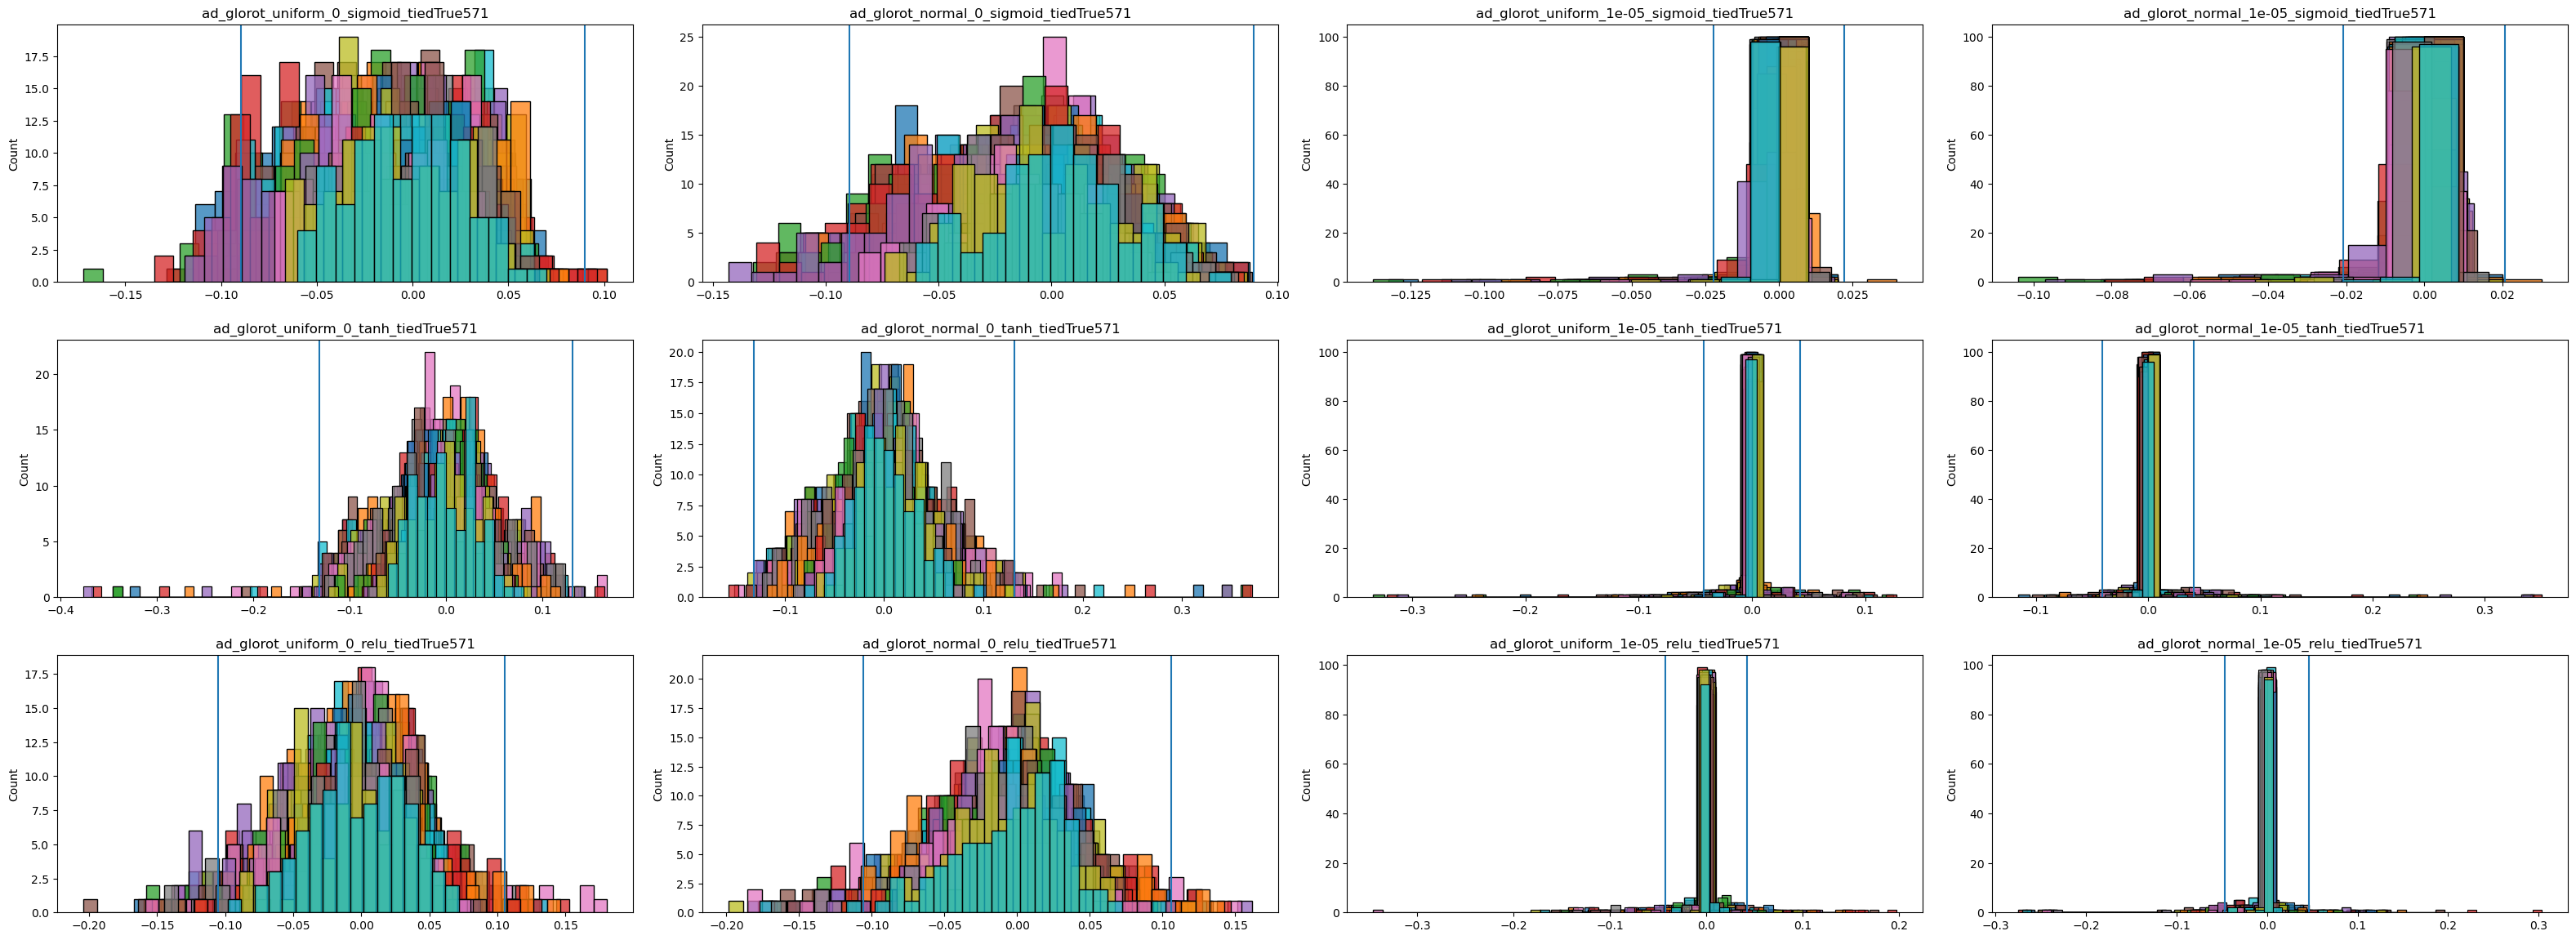

In [15]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(yd*8 ,xd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(571)
                #print(name)
                model_temp = model_dict_seq2[name]
                for node in range(0,100):
                    sns.histplot(model_temp.weights[node], #[model_temp.weights[node] > 0],
                        ax=ax[xi,yi],
                        #hist=True,
                        binwidth = 0.01, 
                        #stat="density",
                        kde=False
                        #rug=False
                                )
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*2.5)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*-2.5)
                ax[xi,yi].set(title = name)
                xi = xi+1
        yi=yi+1


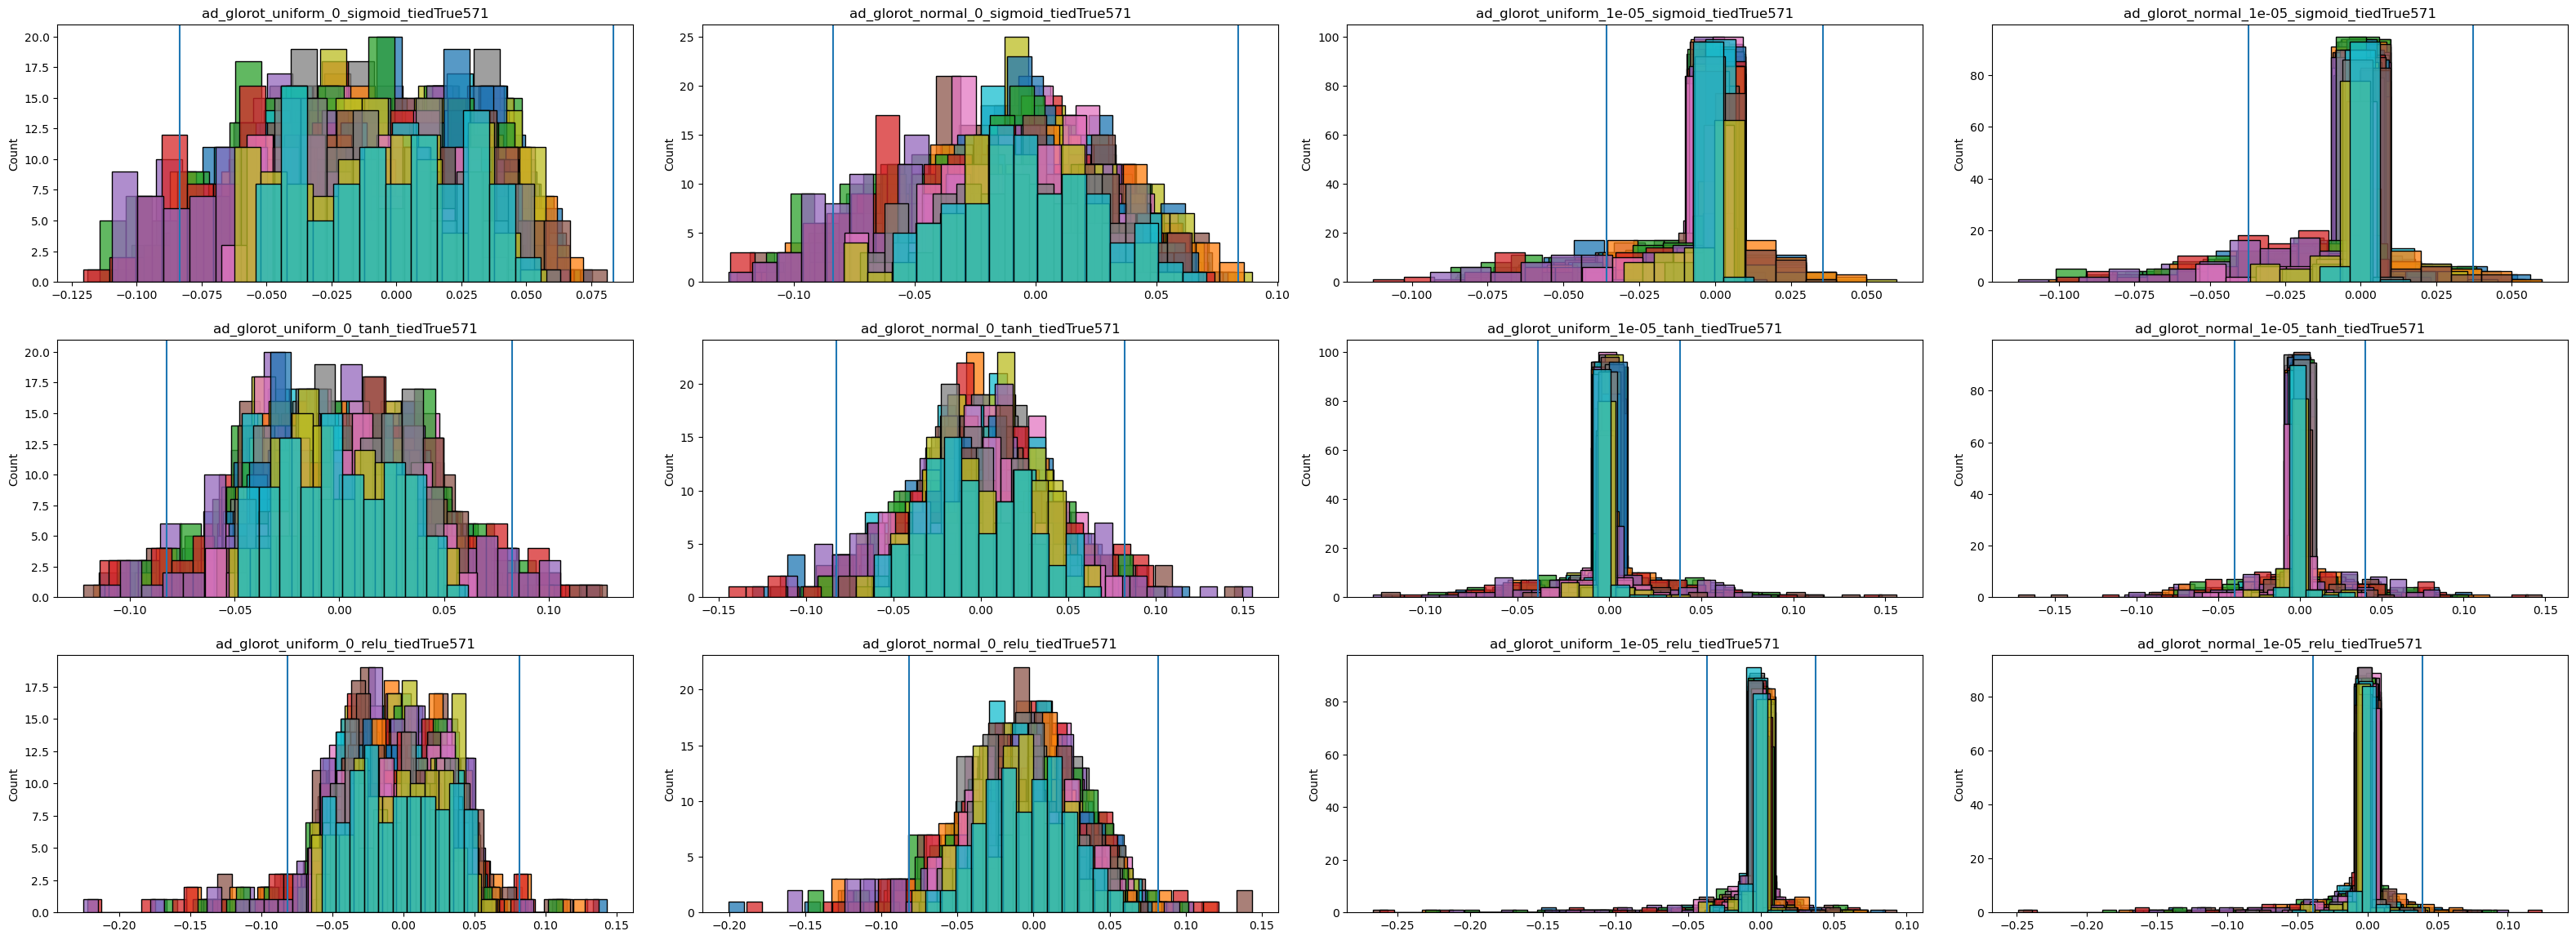

In [16]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(yd*8 ,xd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(571)
                #print(name)
                model_temp = model_dict_seq2CTRL[name]
                for node in range(0,100):
                    sns.histplot(model_temp.weights[node], #[model_temp.weights[node] > 0],
                        ax=ax[xi,yi],
                        #hist=True,
                        binwidth = 0.01, 
                        #stat="density",
                        kde=False
                        #rug=False
                                )
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*2.5)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*-2.5)
                ax[xi,yi].set(title = name)
                xi = xi+1
        yi=yi+1

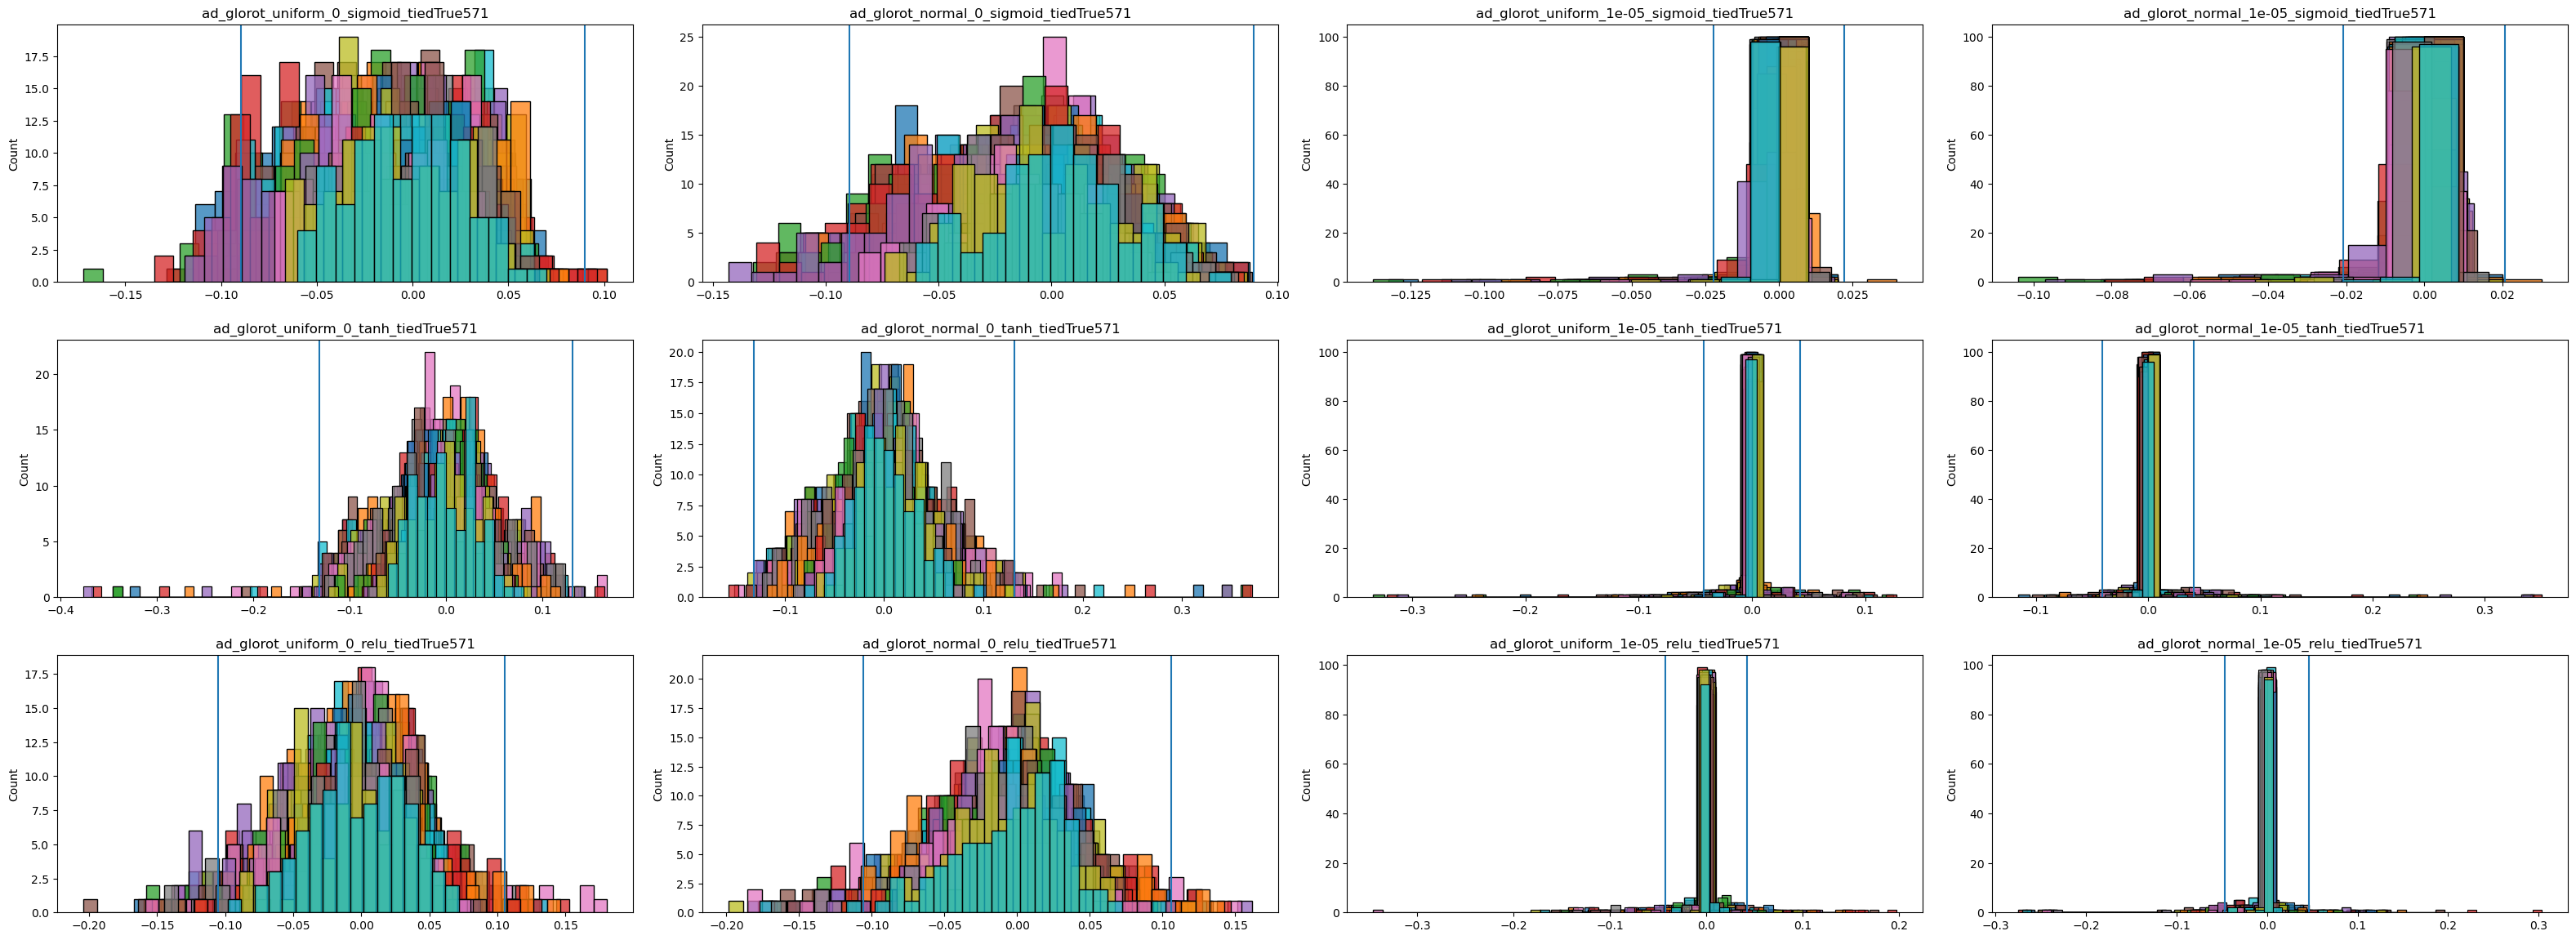

In [17]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(yd*8 ,xd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(571)
                #print(name)
                model_temp = model_dict_seq2[name]
                for node in range(0,100):
                    sns.histplot(model_temp.weights[node], #[model_temp.weights[node] > 0],
                        ax=ax[xi,yi],
                        #hist=True,
                        binwidth = 0.01, 
                        #stat="density",
                        kde=False
                        #rug=False
                                )
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*2.5)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*-2.5)
                ax[xi,yi].set(title = name)
                xi = xi+1
        yi=yi+1


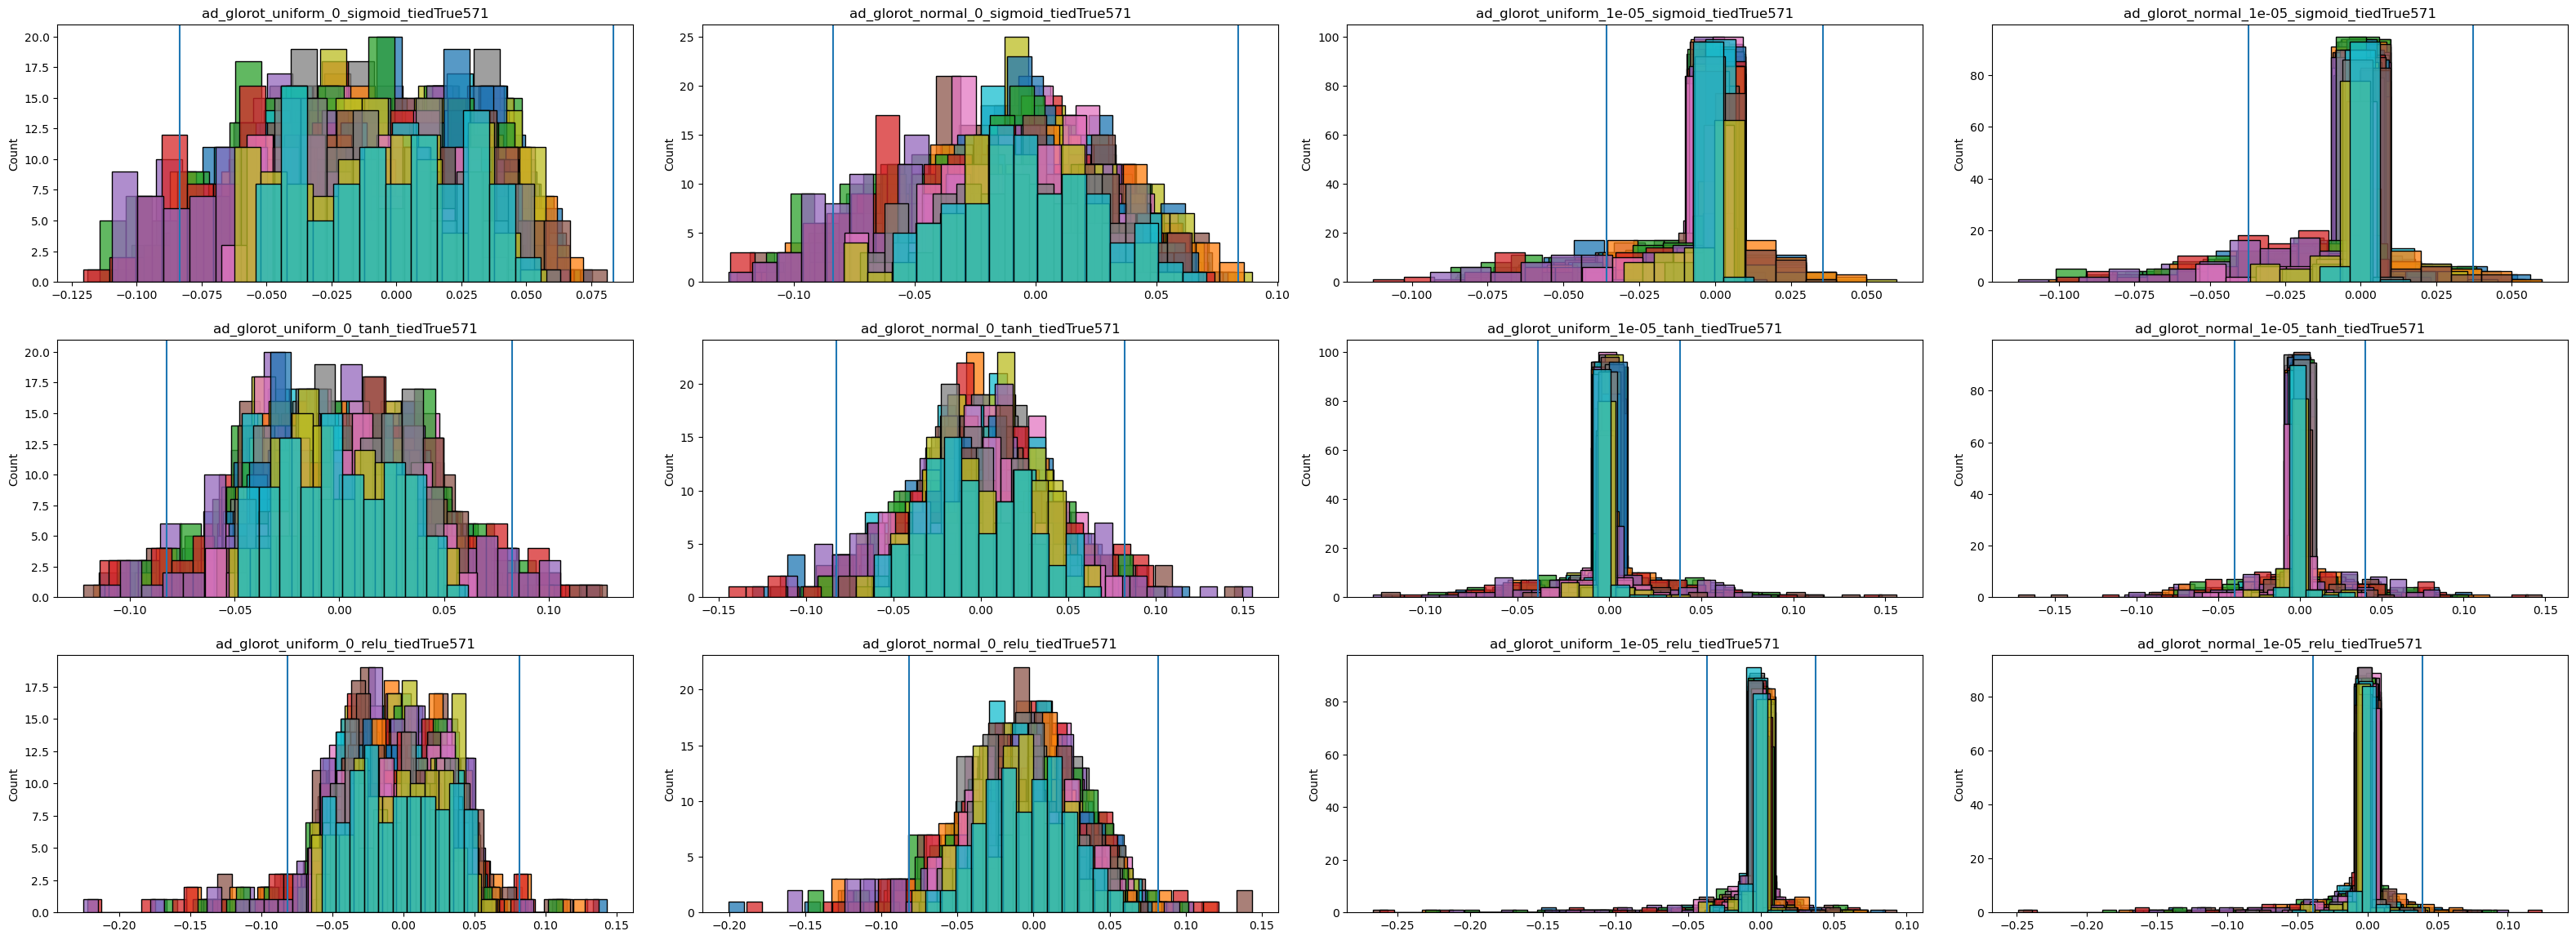

In [18]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(yd*8 ,xd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(571)
                #print(name)
                model_temp = model_dict_seq2CTRL[name]
                for node in range(0,100):
                    sns.histplot(model_temp.weights[node], #[model_temp.weights[node] > 0],
                        ax=ax[xi,yi],
                        #hist=True,
                        binwidth = 0.01, 
                        #stat="density",
                        kde=False
                        #rug=False
                                )
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*2.5)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*-2.5)
                ax[xi,yi].set(title = name)
                xi = xi+1
        yi=yi+1


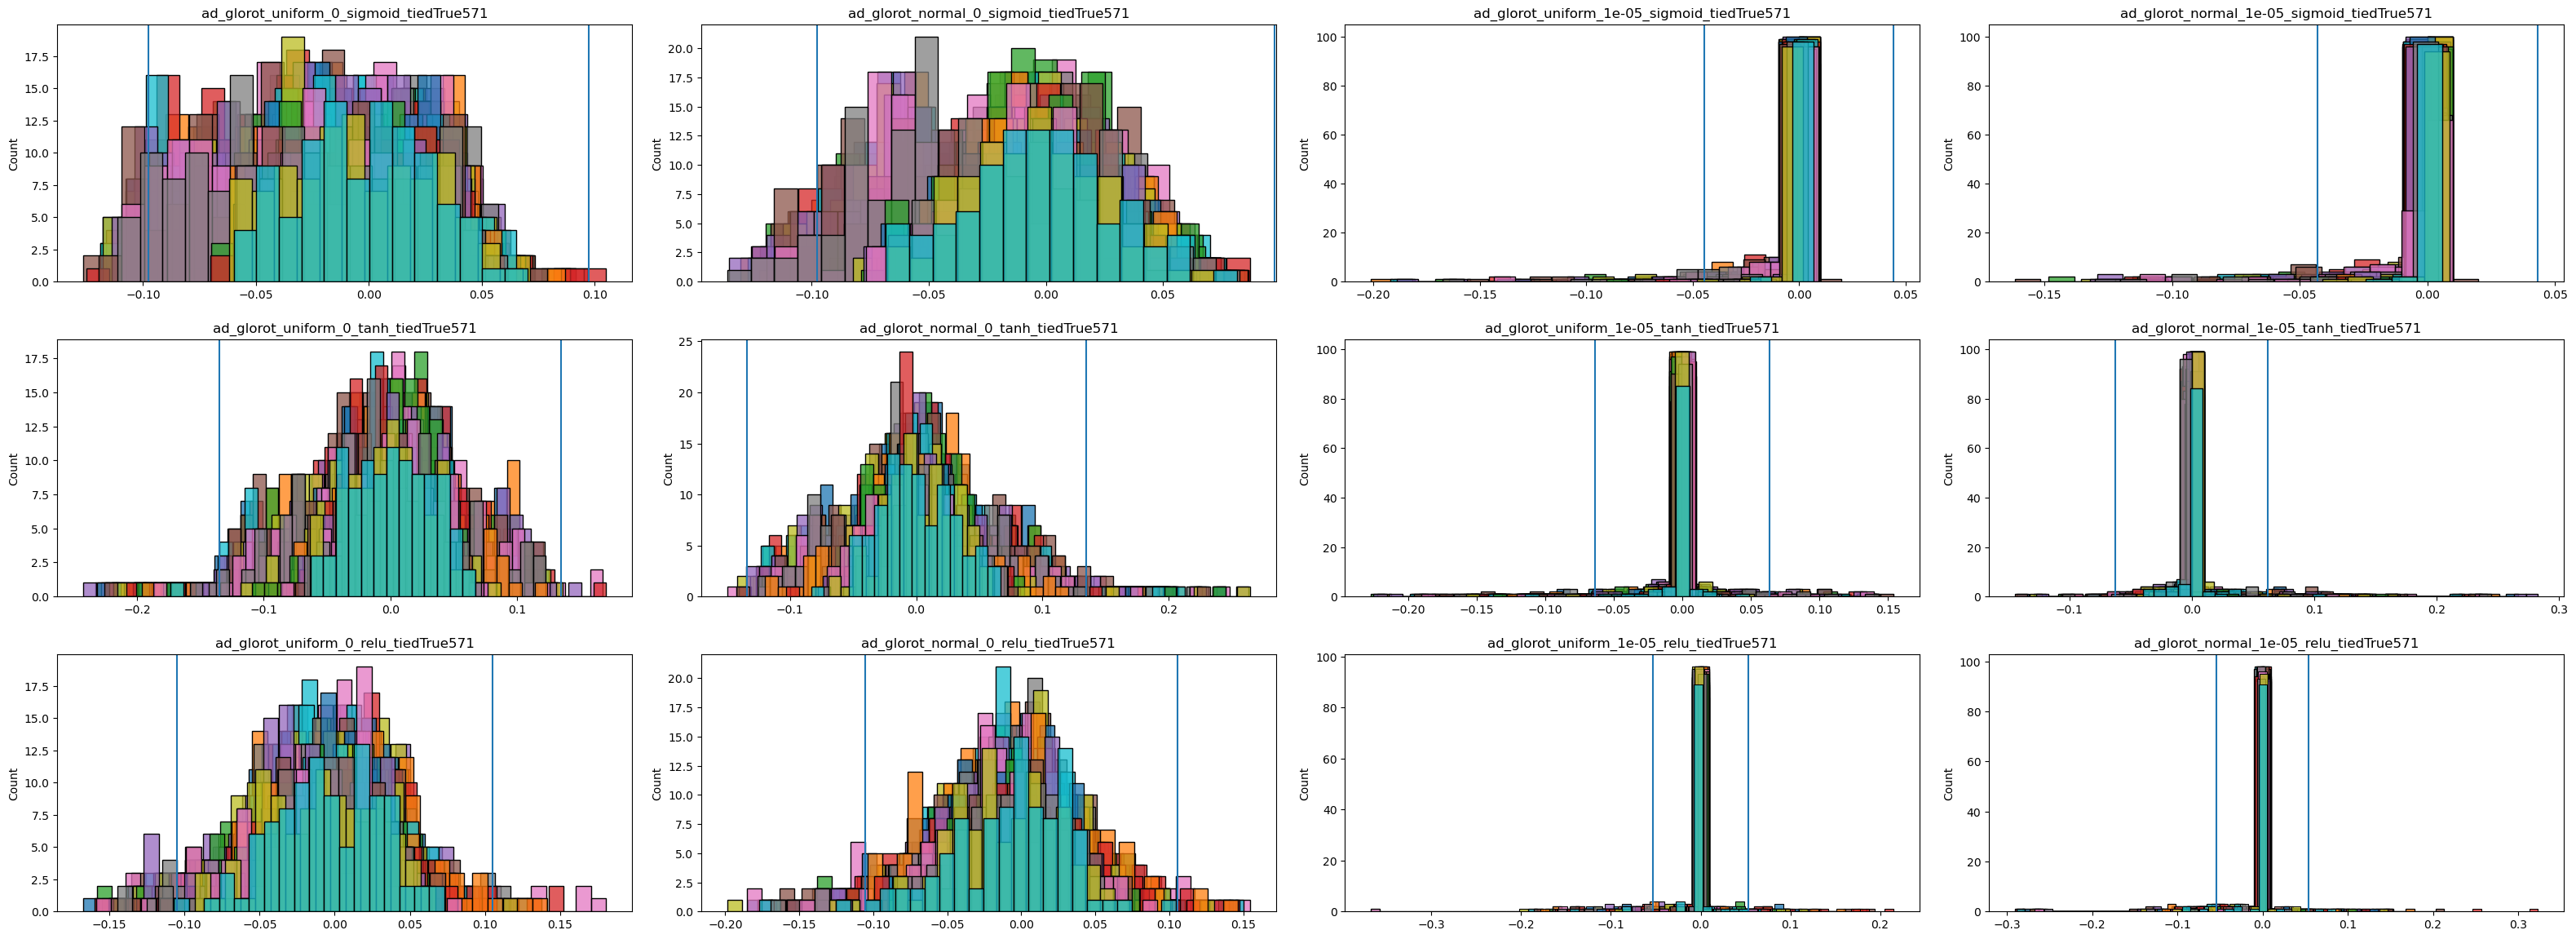

In [19]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(yd*8 ,xd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(571)
                #print(name)
                model_temp = model_dict_pre[name]
                for node in range(0,100):
                    sns.histplot(model_temp.weights[node], #[model_temp.weights[node] > 0],
                        ax=ax[xi,yi],
                        #hist=True,
                        binwidth = 0.01, 
                        #stat="density",
                        kde=False
                        #rug=False
                                )
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*2.5)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*-2.5)
                ax[xi,yi].set(title = name)
                xi = xi+1
        yi=yi+1

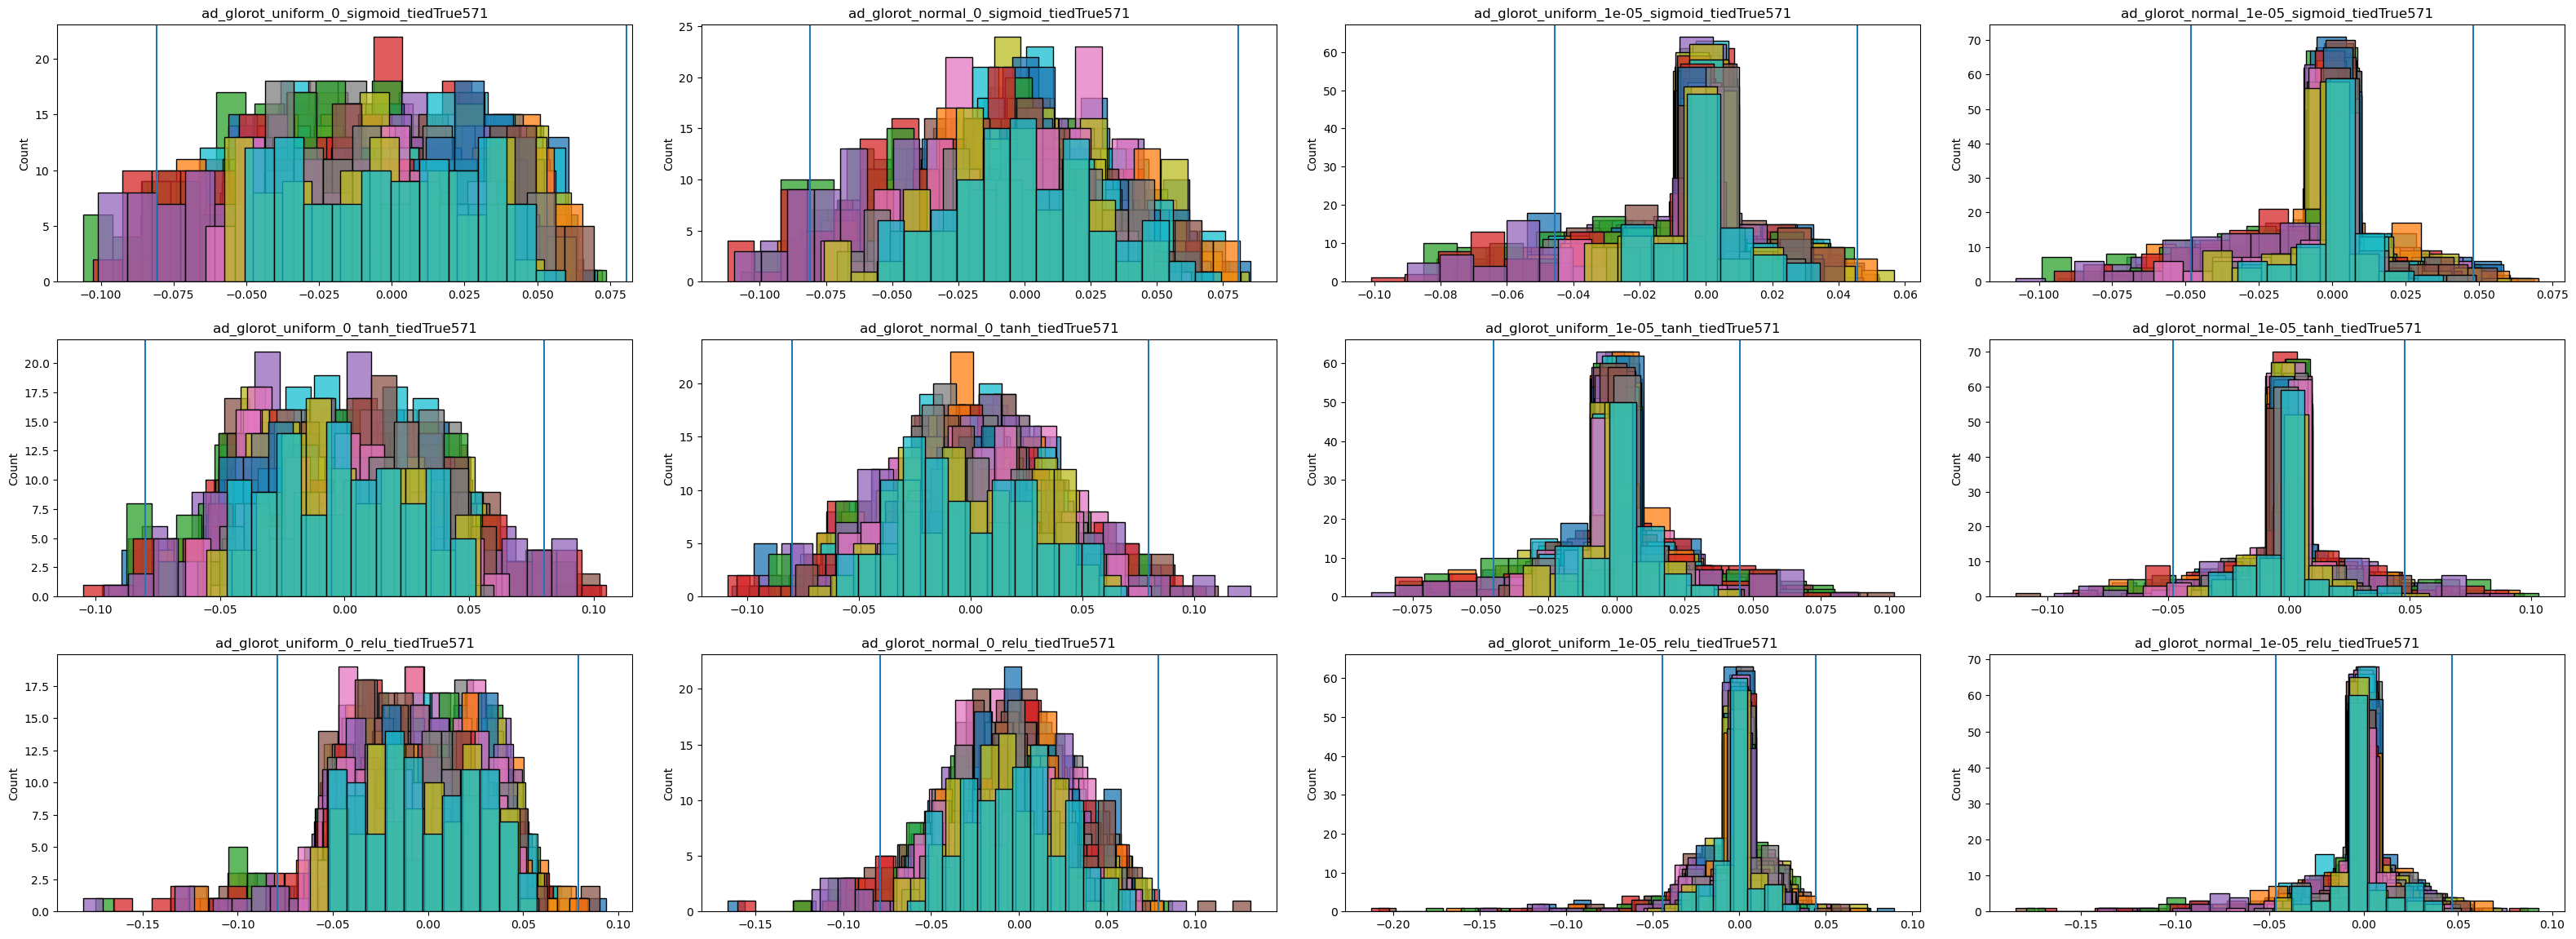

In [20]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(yd*8 ,xd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(571)
                #print(name)
                model_temp = model_dict_preCTRL[name]
                for node in range(0,100):
                    sns.histplot(model_temp.weights[node], #[model_temp.weights[node] > 0],
                        ax=ax[xi,yi],
                        #hist=True,
                        binwidth = 0.01, 
                        #stat="density",
                        kde=False
                        #rug=False
                                )
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*2.5)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*-2.5)
                ax[xi,yi].set(title = name)
                xi = xi+1
        yi=yi+1

In [37]:
model_temp = model_dict_seq2
#del model_temp['tf_adage']
for m in model_temp:
    print(m)
    model_dict_seq2[m].set_hwg_cutoff(2.5)
    #model_dict_seq2[m].set_op('../node_interpretation/operons_format.txt')
    #print('op done')
    model_dict_seq2[m].set_kegg('../node_interpretation/se16_KEGG_format.txt') 
    #print('kegg done')
    #model_dict_seq2[m].set_go('../node_interpretation/manual_GO_BP_terms.txt') 
    #print('go done')
    #model_dict_seq2[m].set_reg('../node_interpretation/regulons_format.txt')
    #print('reg done')
print('dict done') 

model_temp = model_dict_seq2CTRL
#del model_temp['tf_adage']
for m in model_temp:
    print(m)
    model_dict_seq2CTRL[m].set_hwg_cutoff(2.5)
    #model_dict_seq2[m].set_op('../node_interpretation/operons_format.txt')
    #print('op done')
    model_dict_seq2CTRL[m].set_kegg('../node_interpretation/se16_KEGG_format.txt') 
    #print('kegg done')
    #model_dict_seq2[m].set_go('../node_interpretation/manual_GO_BP_terms.txt') 
    #print('go done')
    #model_dict_seq2[m].set_reg('../node_interpretation/regulons_format.txt')
    #print('reg done')
print('dict done') 


model_temp = model_dict_pre
#del model_temp['tf_adage']
for m in model_temp:
    print(m)
    model_dict_pre[m].set_hwg_cutoff(2.5)
    #model_dict_seq2[m].set_op('../node_interpretation/operons_format.txt')
    #print('op done')
    model_dict_pre[m].set_kegg('../node_interpretation/se16_KEGG_format.txt') 
    #print('kegg done')
    #model_dict_seq2[m].set_go('../node_interpretation/manual_GO_BP_terms.txt') 
    #print('go done')
    #model_dict_seq2[m].set_reg('../node_interpretation/regulons_format.txt')
    #print('reg done')
print('dict done')


model_temp = model_dict_preCTRL
#del model_temp['tf_adage']
for m in model_temp:
    print(m)
    model_dict_preCTRL[m].set_hwg_cutoff(2.5)
    #model_dict_seq2[m].set_op('../node_interpretation/operons_format.txt')
    #print('op done')
    model_dict_preCTRL[m].set_kegg('../node_interpretation/se16_KEGG_format.txt') 
    #print('kegg done')
    #model_dict_seq2[m].set_go('../node_interpretation/manual_GO_BP_terms.txt') 
    #print('go done')
    #model_dict_seq2[m].set_reg('../node_interpretation/regulons_format.txt')
    #print('reg done')
print('dict done')

tf_adage
ad_glorot_uniform_0_sigmoid_tiedTrue571
ad_glorot_uniform_0_tanh_tiedTrue571
ad_glorot_uniform_0_relu_tiedTrue571
ad_glorot_uniform_1e-05_sigmoid_tiedTrue571
ad_glorot_uniform_1e-05_tanh_tiedTrue571
ad_glorot_uniform_1e-05_relu_tiedTrue571
ad_glorot_normal_0_sigmoid_tiedTrue571
ad_glorot_normal_0_tanh_tiedTrue571
ad_glorot_normal_0_relu_tiedTrue571
ad_glorot_normal_1e-05_sigmoid_tiedTrue571
ad_glorot_normal_1e-05_tanh_tiedTrue571
ad_glorot_normal_1e-05_relu_tiedTrue571
dict done
tf_adage
ad_glorot_uniform_0_sigmoid_tiedTrue571
ad_glorot_uniform_0_tanh_tiedTrue571
ad_glorot_uniform_0_relu_tiedTrue571
ad_glorot_uniform_1e-05_sigmoid_tiedTrue571
ad_glorot_uniform_1e-05_tanh_tiedTrue571
ad_glorot_uniform_1e-05_relu_tiedTrue571
ad_glorot_normal_0_sigmoid_tiedTrue571
ad_glorot_normal_0_tanh_tiedTrue571
ad_glorot_normal_0_relu_tiedTrue571
ad_glorot_normal_1e-05_sigmoid_tiedTrue571
ad_glorot_normal_1e-05_tanh_tiedTrue571
ad_glorot_normal_1e-05_relu_tiedTrue571
dict done
tf_adage
ad_gl

ad_glorot_uniform_0_sigmoid_tiedTrue571
ad_glorot_uniform_0_tanh_tiedTrue571
ad_glorot_uniform_0_relu_tiedTrue571
ad_glorot_uniform_1e-05_sigmoid_tiedTrue571
ad_glorot_uniform_1e-05_tanh_tiedTrue571
ad_glorot_uniform_1e-05_relu_tiedTrue571
ad_glorot_normal_0_sigmoid_tiedTrue571
ad_glorot_normal_0_tanh_tiedTrue571
ad_glorot_normal_0_relu_tiedTrue571
ad_glorot_normal_1e-05_sigmoid_tiedTrue571
ad_glorot_normal_1e-05_tanh_tiedTrue571
ad_glorot_normal_1e-05_relu_tiedTrue571


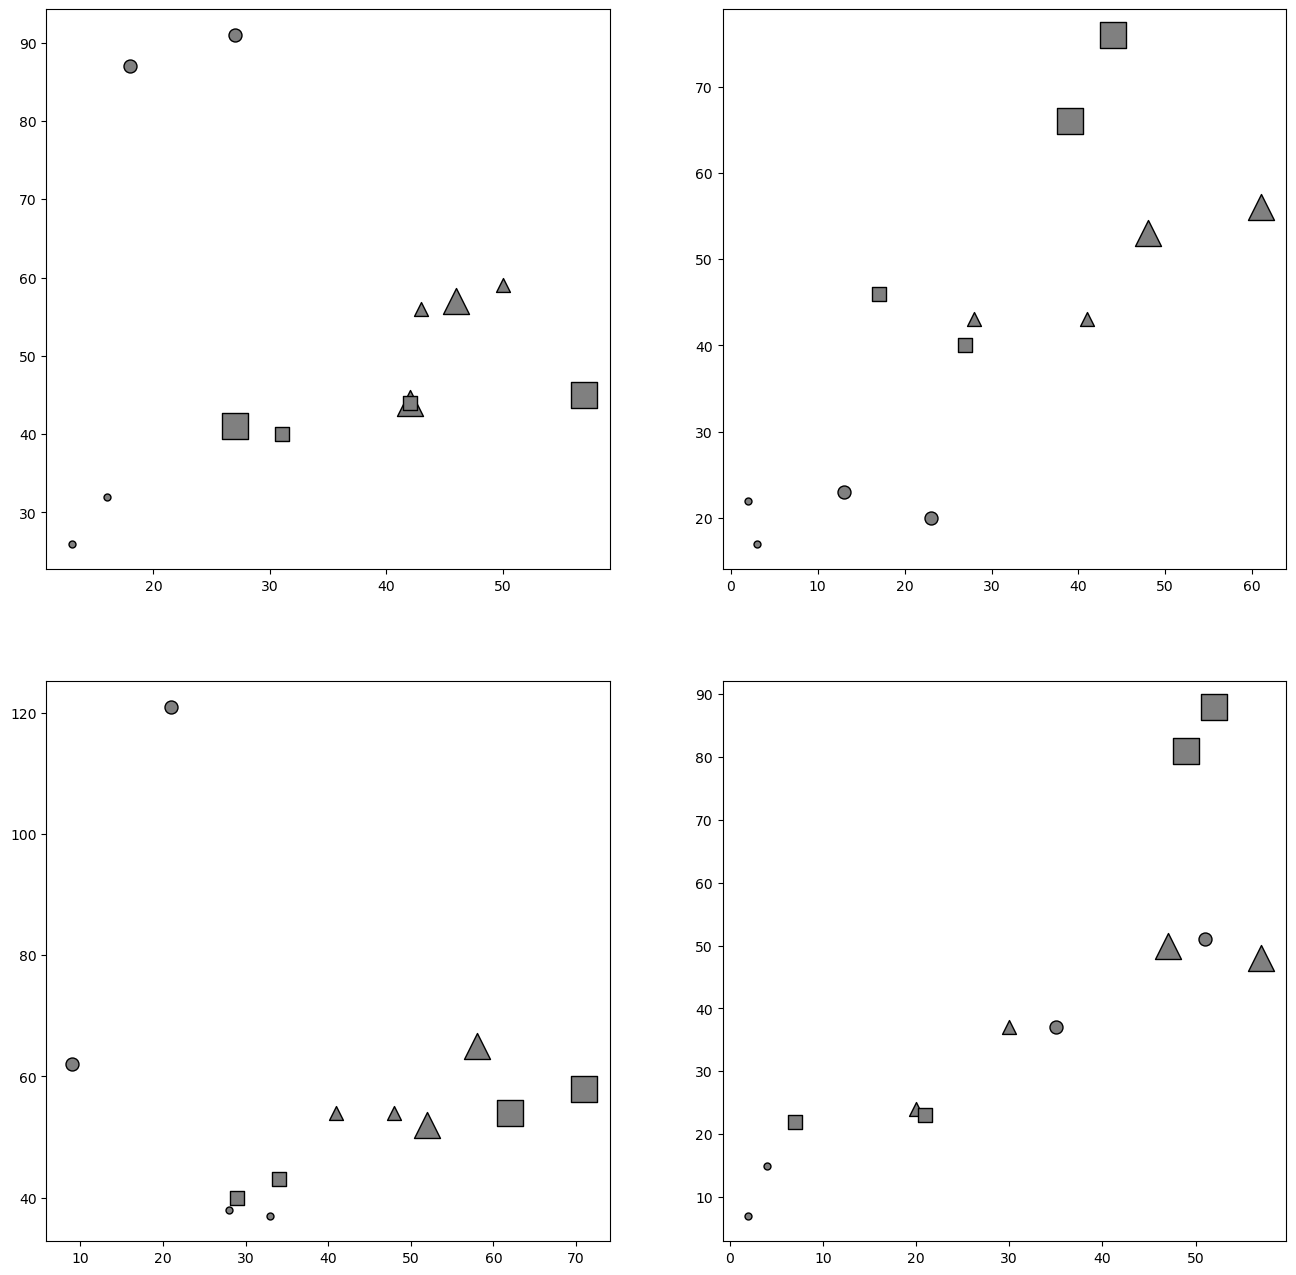

In [38]:


plimk=5
plimg=5
plimr=5
plimo=5
xd=2
yd=2
fig, ax = plt.subplots(xd,yd,figsize=(xd*8 ,yd *8))
#x = ((model_dict_seq2['tf_adage'].kegg_ps > plimk).sum(0) > 0).sum()
#y = ((model_dict_seq2['tf_adage'].kegg_ps > plimk).sum(1) > 0).sum()
#ax[0,0].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
#ax[0,0].set(title = 'KEGG', xlabel = 'Total Paths', ylabel = 'Sigs with Paths')

#x = ((model_dict_da_reps['tf_adage'].go_ps > plimg).sum(0) > 0).sum()
#y = ((model_dict_da_reps['tf_adage'].go_ps > plimg).sum(1) > 0).sum()
#ax[0,1].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
#ax[0,1].set(title = 'GO', xlabel = 'Total BP', ylabel = 'Sigs with BP')

#x = ((model_dict_da_reps['tf_adage'].regs_ps > plimr).sum(0) > 0).sum()
#y = ((model_dict_da_reps['tf_adage'].regs_ps > plimr).sum(1) > 0).sum()
#ax[1,0].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
#ax[1,0].set(title = 'Regulons', xlabel = 'Total Regs', ylabel = 'Sigs with Regs')

#x = ((model_dict_da_reps['tf_adage'].ops_ps > plimo).sum(0) > 0).sum()
#y = ((model_dict_da_reps['tf_adage'].ops_ps > plimo).sum(1) > 0).sum()
#ax[1,1].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
#ax[1,1].set(title = 'Operons', xlabel = 'Total Operons', ylabel = 'Sigs with Operons')

xi = 0
yi = 0
c = 'grey'

# edge color is tied or unties
ec = ['black','red','blue','green','purple']
eci=0

# shape is activation function
ms = ['.','s', '^','h']
mi=0

# size is L1 norm
s=50

for seed in range(1):
    for i in inits:
        s=100
    #print(i)
        for l in L1_norm:
            xi=0
            mi=0
        #print(l)
            for a in act_fun:
                m = ms[mi]
                eci=0
            #print(a)
                for t in tied:
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(571)
                    print(name)
                    model_temp = model_dict_seq2[name]
                    x = ((model_temp.kegg_ps > plimk).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > plimk).sum(1) > 0).sum()
                    ax[0,0].scatter(x, y, c = c, marker = m, edgecolor = ec[eci], s=s)
                    
                    model_temp = model_dict_seq2CTRL[name]
                    x = ((model_temp.kegg_ps > plimk).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > plimk).sum(1) > 0).sum()
                    ax[0,1].scatter(x, y, c = c, marker = m, edgecolor = ec[eci], s=s)
                    
                    model_temp = model_dict_pre[name]
                    x = ((model_temp.kegg_ps > plimk).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > plimk).sum(1) > 0).sum()
                    ax[1,0].scatter(x, y, c = c, marker = m, edgecolor = ec[eci], s=s)
                    
                    model_temp = model_dict_preCTRL[name]
                    x = ((model_temp.kegg_ps > plimk).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > plimk).sum(1) > 0).sum()
                    ax[1,1].scatter(x, y, c = c, marker = m, edgecolor = ec[eci], s=s)
                    eci = eci+1
                mi = mi+1
            s=s+250
        c = 'grey'
                    


ad_glorot_uniform_0_sigmoid_tiedTrue571
ad_glorot_uniform_0_tanh_tiedTrue571
ad_glorot_uniform_0_relu_tiedTrue571
ad_glorot_uniform_1e-05_sigmoid_tiedTrue571
ad_glorot_uniform_1e-05_tanh_tiedTrue571
ad_glorot_uniform_1e-05_relu_tiedTrue571
ad_glorot_normal_0_sigmoid_tiedTrue571
ad_glorot_normal_0_tanh_tiedTrue571
ad_glorot_normal_0_relu_tiedTrue571
ad_glorot_normal_1e-05_sigmoid_tiedTrue571
ad_glorot_normal_1e-05_tanh_tiedTrue571
ad_glorot_normal_1e-05_relu_tiedTrue571


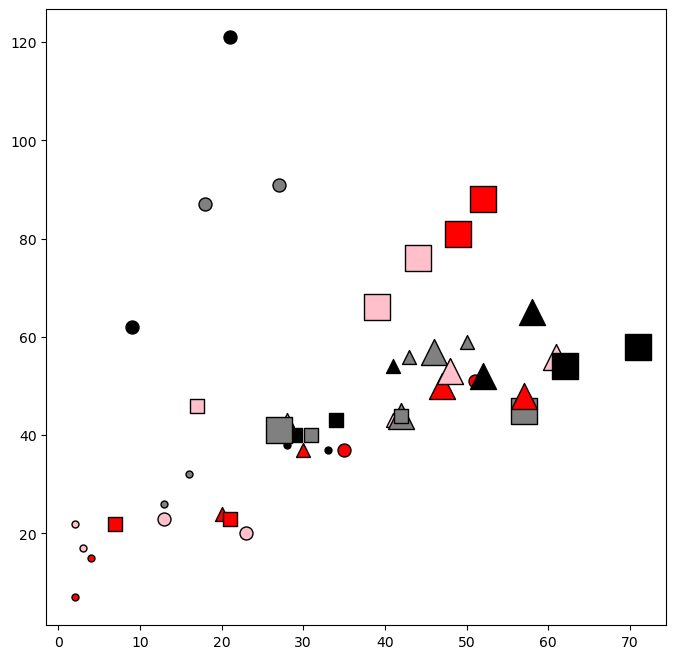

In [39]:

plimk=5
plimg=5
plimr=5
plimo=5
xd=1
yd=1
fig, ax = plt.subplots(xd,yd,figsize=(xd*8 ,yd *8))
#x = ((model_dict_seq2['tf_adage'].kegg_ps > plimk).sum(0) > 0).sum()
#y = ((model_dict_seq2['tf_adage'].kegg_ps > plimk).sum(1) > 0).sum()
#ax[0,0].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
#ax[0,0].set(title = 'KEGG', xlabel = 'Total Paths', ylabel = 'Sigs with Paths')

#x = ((model_dict_da_reps['tf_adage'].go_ps > plimg).sum(0) > 0).sum()
#y = ((model_dict_da_reps['tf_adage'].go_ps > plimg).sum(1) > 0).sum()
#ax[0,1].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
#ax[0,1].set(title = 'GO', xlabel = 'Total BP', ylabel = 'Sigs with BP')

#x = ((model_dict_da_reps['tf_adage'].regs_ps > plimr).sum(0) > 0).sum()
#y = ((model_dict_da_reps['tf_adage'].regs_ps > plimr).sum(1) > 0).sum()
#ax[1,0].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
#ax[1,0].set(title = 'Regulons', xlabel = 'Total Regs', ylabel = 'Sigs with Regs')

#x = ((model_dict_da_reps['tf_adage'].ops_ps > plimo).sum(0) > 0).sum()
#y = ((model_dict_da_reps['tf_adage'].ops_ps > plimo).sum(1) > 0).sum()
#ax[1,1].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
#ax[1,1].set(title = 'Operons', xlabel = 'Total Operons', ylabel = 'Sigs with Operons')

xi = 0
yi = 0
c = 'grey'

# edge color is tied or untied
ec = ['black','red','blue','green','purple']
eci=0

# shape is activation function
ms = ['.','s', '^','h']
mi=0

# size is L1 norm
s=50

for seed in range(1):
    for i in inits:
        s=100
    #print(i)
        for l in L1_norm:
            xi=0
            mi=0
        #print(l)
            for a in act_fun:
                m = ms[mi]
                eci=0
            #print(a)
                for t in tied:
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(571)
                    print(name)
                    model_temp = model_dict_seq2[name]
                    x = ((model_temp.kegg_ps > plimk).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > plimk).sum(1) > 0).sum()
                    ax.scatter(x, y, c = 'grey', marker = m, edgecolor = ec[eci], s=s)
                    
                    model_temp = model_dict_seq2CTRL[name]
                    x = ((model_temp.kegg_ps > plimk).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > plimk).sum(1) > 0).sum()
                    ax.scatter(x, y, c = 'pink', marker = m, edgecolor = ec[eci], s=s)
                    
                    model_temp = model_dict_pre[name]
                    x = ((model_temp.kegg_ps > plimk).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > plimk).sum(1) > 0).sum()
                    ax.scatter(x, y, c = 'black', marker = m, edgecolor = ec[eci], s=s)
                    
                    model_temp = model_dict_preCTRL[name]
                    x = ((model_temp.kegg_ps > plimk).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > plimk).sum(1) > 0).sum()
                    ax.scatter(x, y, c = 'red', marker = m, edgecolor = ec[eci], s=s)
                    eci = eci+1
                mi = mi+1
            s=s+250
        c = 'grey'
                    
